- Hierarchical clustering is  unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.
- In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.
- The hierarchical clustering technique has two approaches:
1. Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
2. Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

<h4> Why hierarchical clustering?</h4>

- As we are going to seen in the K-means clustering that there are some challenges with this algorithm, which are a predetermined number of clusters, and it always tries to create the clusters of the same size. To solve these two challenges, we can opt for the hierarchical clustering algorithm because, in this algorithm, we don't need to have knowledge about the predefined number of clusters.

<h3> Agglomerative Hierarchical clustering</h3>

The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.

This hierarchy of clusters is represented in the form of the dendrogram.

<h4> How the agglomerative clustering works </h4>

- To understand how the Agglomerative Clustering works we will consider the flow of following diagrams:

<img src='a1.png'>
<img src='12.png'>
<img src='a3.png'>
<img src='a4.png'>
<img src='a5.png'>
<img src='a6.png'>


<h4> Python Implementation of Agglomerative Hierarchical Clustering;</h4>

The steps for implementation will be the same as the k-means clustering, except for some changes such as the method to find the number of clusters. Below are the steps:

1. Data Pre-processing
2. Finding the optimal number of clusters using the Dendrogram
3. Training the hierarchical clustering model
4. Visualizing the clusters

<h4> Step 1: Data Pre-processing Steps </h4>

In [2]:
# Importing the libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [3]:
# Importing the dataset  
dataset = pd.read_csv('Mall_Customers.csv')  

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Here we will extract only the matrix of features as we don't have any further information about the dependent variable. Code is given below:
x = dataset.iloc[:, [3, 4]].values

In [6]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<h4> Step 2: Finding the optimal number of clusters using the Dendrogram </h4>

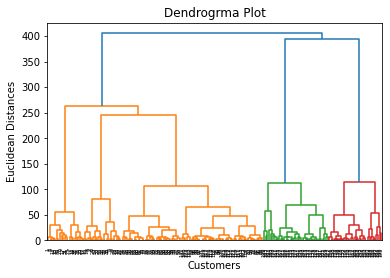

In [8]:
# Now we will find the optimal number of clusters using the Dendrogram for our model. 
# For this, we are going to use scipy library as it provides a function that will directly return the dendrogram for our code. 
# Consider the below lines of code:

#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward")) # The linkage function is used to define the distance between two clusters 
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

<h4> Step 3: Training the hierarchical clustering model </h4>

In [10]:
# As we know the required optimal number of clusters, we can now train our model. The code is given below:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') #'ward' It reduces the variance in each cluster. 
y_pred= hc.fit_predict(x)  

# In the last line, we have created the dependent variable y_pred to fit or train the model. It does train not only the model but also returns the clusters to which each data point belongs.


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<h4> Step 4: Visualizing the clusters </h4>

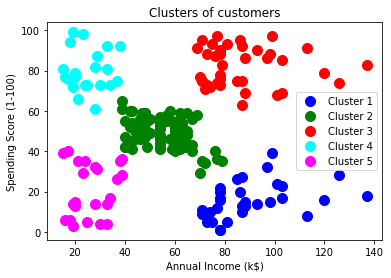

In [11]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
'''
This line creates a scatter plot for data points that belong to Cluster 1. 
The x[y_pred == 0, 0] and x[y_pred == 0, 1] select the data points in the first cluster 
based on the clustering results (y_pred). The s = 100 sets the marker size
, and c = 'blue' sets the color to blue. The label = 'Cluster 1' is used for the legend.
'''
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  